In [1]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=c3ae67c560818f6ec37b87c495fa6439b38e139ce4b11b7198d37aca6c5aa8ae
  Stored in directory: /home/datalore/.cache/pip/wheels/59/1b/52/0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
dataset = "/data/workspace_files/dataset2"

In [4]:
imagePaths=list(paths.list_images(dataset))

In [5]:
imagePaths

['/data/workspace_files/dataset2/with_mask/with_mask_2007.jpg',
 '/data/workspace_files/dataset2/with_mask/with_mask_70.jpg',
 '/data/workspace_files/dataset2/with_mask/with_mask_2201.jpg',
 '/data/workspace_files/dataset2/with_mask/with_mask_224.jpg',
 '/data/workspace_files/dataset2/with_mask/with_mask_2023.jpg',
 '/data/workspace_files/dataset2/with_mask/with_mask_1609.jpg',
 '/data/workspace_files/dataset2/with_mask/with_mask_2120.jpg',
 '/data/workspace_files/dataset2/with_mask/with_mask_38.jpg',
 '/data/workspace_files/dataset2/with_mask/with_mask_3412.jpg',
 '/data/workspace_files/dataset2/with_mask/with_mask_1785.jpg',
 '/data/workspace_files/dataset2/with_mask/with_mask_1641.jpg',
 '/data/workspace_files/dataset2/with_mask/with_mask_1963.jpg',
 '/data/workspace_files/dataset2/with_mask/with_mask_3556.jpg',
 '/data/workspace_files/dataset2/with_mask/with_mask_1560.jpg',
 '/data/workspace_files/dataset2/with_mask/with_mask_1463.jpg',
 '/data/workspace_files/dataset2/with_mask/wi

In [6]:
data=[]
labels=[]

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image = load_img(i,target_size=(96,96))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)

/opt/python/envs/default/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [7]:
data = np.array(data,dtype='float32')
labels = np.array(labels)

In [8]:
labels

array(['with_mask', 'with_mask', 'with_mask', ..., 'without_mask',
       'without_mask', 'without_mask'], dtype='<U12')

In [9]:
lb=LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [10]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [11]:
## Splitting of Data

train_X,test_X,train_Y,test_Y = train_test_split(data,labels,test_size=0.20,random_state=10,stratify=labels)

In [12]:
train_X

array([[[[ 0.56078434,  0.56078434,  0.4666667 ],
         [ 0.54509807,  0.54509807,  0.45098042],
         [ 0.5372549 ,  0.5372549 ,  0.4431373 ],
         ...,
         [ 0.49803925,  0.5294118 ,  0.5372549 ],
         [ 0.49803925,  0.5294118 ,  0.5372549 ],
         [ 0.4901961 ,  0.52156866,  0.5294118 ]],

        [[ 0.56078434,  0.56078434,  0.4666667 ],
         [ 0.54509807,  0.54509807,  0.45098042],
         [ 0.5372549 ,  0.5372549 ,  0.4431373 ],
         ...,
         [ 0.49803925,  0.5294118 ,  0.5372549 ],
         [ 0.49803925,  0.5294118 ,  0.5372549 ],
         [ 0.4901961 ,  0.52156866,  0.5294118 ]],

        [[ 0.56078434,  0.56078434,  0.4666667 ],
         [ 0.54509807,  0.54509807,  0.45098042],
         [ 0.5372549 ,  0.5372549 ,  0.4431373 ],
         ...,
         [ 0.49803925,  0.5294118 ,  0.5372549 ],
         [ 0.49803925,  0.5294118 ,  0.5372549 ],
         [ 0.4901961 ,  0.52156866,  0.5294118 ]],

        ...,

        [[-0.26274508, -0.26274508, -0

In [13]:
train_Y.size

6400

In [14]:
test_Y.size

1600

In [15]:
aug=ImageDataGenerator(
                       rotation_range=20,
                       zoom_range=0.15,width_shift_range=0.2,
                       height_shift_range=0.2,shear_range=0.15,
                       horizontal_flip=True,
                       vertical_flip=True,
                       fill_mode='nearest'
                       )

In [16]:
input_shape = (96,96,3)

In [17]:
# Build Model
input_image = Input(shape=input_shape)
# 1st Conv layer
model = Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape)(input_image)
model = MaxPooling2D((2, 2),padding='same')(model)
# 2nd Conv layer
model = Conv2D(32, (3, 3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2),padding='same')(model)
# 3rd Conv layer
model = Conv2D(64, (3, 3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2),padding='same')(model)
# 4th Conv layer
model = Conv2D(128, (3, 3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2),padding='same')(model)
# 5th Conv layer
model = Conv2D(256, (3, 3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2),padding='same')(model)
# FC layers
model = Flatten()(model)
#model = Dense(1024, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(model)
model = Dense(1024)(model)
#model = Dropout(0.2)(model)

#model = Dense(64, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(model)
model = Dense(64)(model)
#model = Dropout(0.2)(model)

output= Dense(2, activation='softmax')(model)

model = Model(inputs=[input_image], outputs=[output])

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0     

In [19]:
lr=0.0005
Epochs=100
BS=32

opt=Adam(learning_rate=lr,decay=lr/Epochs)

In [20]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [21]:
history=model.fit(
aug.flow(train_X,train_Y,batch_size=BS),
steps_per_epoch=len(train_X)//BS,
validation_data=(test_X,test_Y),
validation_steps=len(test_X)//BS,
epochs=Epochs
    
)


Epoch 43/100
100/100 [==============================] - 6s 62ms/step - loss: 0.0728 - accuracy: 0.9750 - val_loss: 0.0768 - val_accuracy: 0.9725
Epoch 44/100
100/100 [==============================] - 6s 62ms/step - loss: 0.0570 - accuracy: 0.9787 - val_loss: 0.0968 - val_accuracy: 0.9700
Epoch 45/100
100/100 [==============================] - 6s 62ms/step - loss: 0.0759 - accuracy: 0.9759 - val_loss: 0.0927 - val_accuracy: 0.9750
Epoch 46/100
100/100 [==============================] - 6s 65ms/step - loss: 0.0603 - accuracy: 0.9795 - val_loss: 0.0820 - val_accuracy: 0.9762
Epoch 47/100
100/100 [==============================] - 6s 62ms/step - loss: 0.0659 - accuracy: 0.9824 - val_loss: 0.1331 - val_accuracy: 0.9525
Epoch 48/100
100/100 [==============================] - 6s 62ms/step - loss: 0.0784 - accuracy: 0.9679 - val_loss: 0.0920 - val_accuracy: 0.9762
Epoch 49/100
100/100 [==============================] - 6s 62ms/step - loss: 0.0694 - accuracy: 0.9795 - val_loss: 0.0659 - val_ac

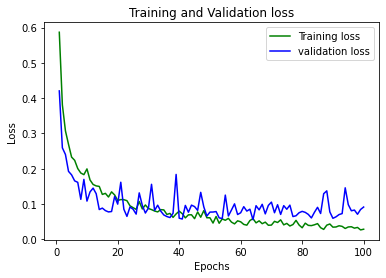

In [22]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

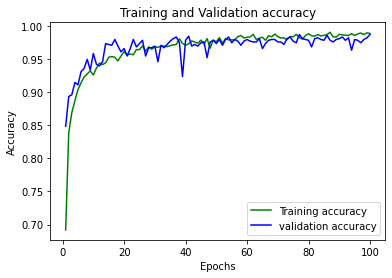

In [23]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

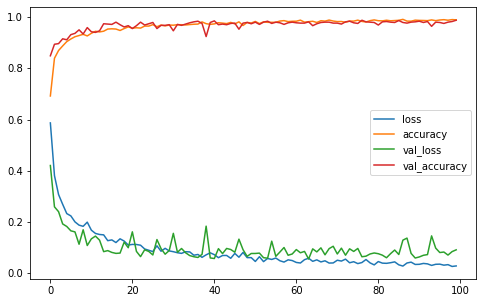

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [28]:
model.save('custom_4000_32_100.h5')

In [26]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.98      0.99       400
without_mask       0.98      0.99      0.99       400

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

